# Training on Custom Dataset

Training the model on BBC extractive summaries dataset after required preprocessing

In [ ]:
#Required Imports for dataset analysis plots and file handling
import os
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0, 0, 'tech'),
 Text(0, 0, 'business'),
 Text(0, 0, 'sport'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'entertainment')]

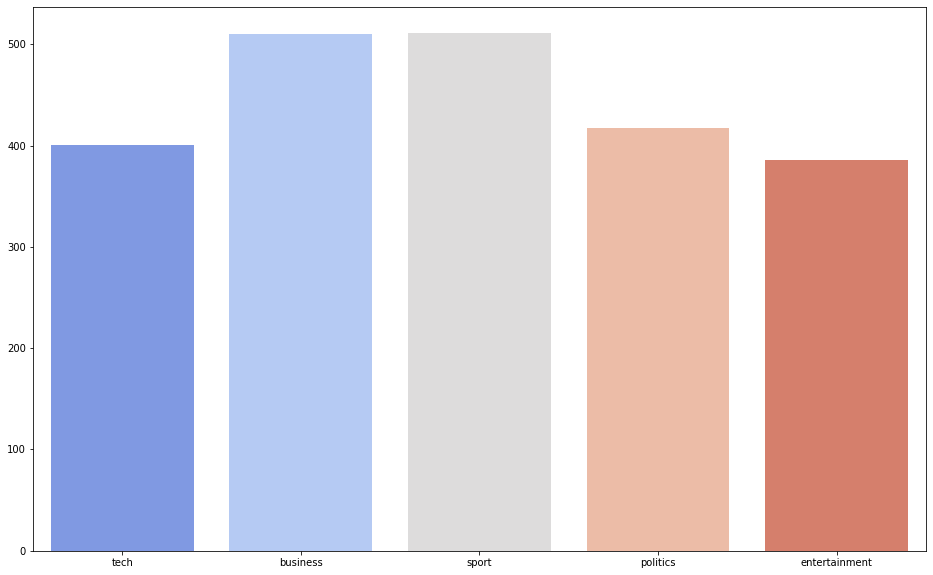

In [ ]:
#BBC News Summary Dataset distribution across 5 categories

#Set the path to the BBC dataset
BBC_DATA_PATH = "/"

classes = os.listdir( BBC_DATA_PATH + "/BBC News Summary/News Articles")
no_1=[]
for cat in classes:
  no_1.append(len(os.listdir( BBC_DATA_PATH + "/BBC News Summary/News Articles/"+str(cat))))
plt.figure(figsize=(16,10))
dist = sns.barplot(x=classes,y=no_1,palette='coolwarm')
dist.set_xticklabels(dist.get_xticklabels(),rotation=0)

The following 5 cells are for preparing the dataset in the format required before preprocessing. This requires the one text file per sample with the news article at the top and each corresponding summary at the bottom under "@highlight" tags. An example is as follows:

Veteran Martinez wins Thai title

Conchita Martinez won her first title in almost five years with victory over Anna-Lena Groenefeld at the Volvo Women's Open in Pattaya, Thailand.

The 32-year-old Spaniard came through 6-3 3-6 6-3 for her first title since Berlin in 2000. "It feels really good," said Martinez, who is playing her last season on the Tour. "To come through like that in an important match feels good. "It's been nearly five years and I didn't think I could do it." Groenefeld was the more powerful player but could not match her opponent's relentless accuracy. "It was my first final, a new experience," said the German. "I think she played a good match, a tough match, but I tried to stay in there. I think the whole week was good for me."

@highlight

"To come through like that in an important match feels good

@highlight

""I think she played a good match, a tough match, but I tried to stay in there

@highlight

Groenefeld was the more powerful player but could not match her opponent's relentless accuracy


In [ ]:
for filename in os.listdir(BBC_DATA_PATH + "/BBC News Summary/News Articles/business"):
  with open(BBC_DATA_PATH + "/BBC News Summary/Summaries/business/"+filename) as f1:
    with open(BBC_DATA_PATH + "/BBC News Summary/News Articles/business/"+filename,'a') as f2:
      for line in f1:
        lines = line.split('.')
        lines.sort(key = len)
        lines = lines[-3:]
        for summ in lines:
          f2.write("\n")
          f2.write("@highlight\n")
          f2.write("\n")
          f2.write(summ+"\n") 

In [ ]:
for filename in os.listdir(BBC_DATA_PATH + "/BBC/BBC News Summary/News Articles/entertainment"):
  with open(BBC_DATA_PATH + "/BBC/BBC News Summary/Summaries/entertainment/"+filename) as f1:
    with open( BBC_DATA_PATH + "/BBC News Summary/News Articles/entertainment/"+filename,'a') as f2:
      for line in f1:
        lines = line.split('.')
        lines.sort(key = len)
        lines = lines[-3:]
        for summ in lines:
          f2.write("\n")
          f2.write("@highlight\n")
          f2.write("\n")
          f2.write(summ+"\n") 

In [ ]:
for filename in os.listdir( BBC_DATA_PATH + "/BBC News Summary/News Articles/politics"):
  with open( BBC_DATA_PATH + "/BBC News Summary/Summaries/politics/"+filename) as f1:
    with open( BBC_DATA_PATH + "/BBC News Summary/News Articles/politics/"+filename,'a') as f2:
      for line in f1:
        lines = line.split('.')
        lines.sort(key = len)
        lines = lines[-3:]
        for summ in lines:
          f2.write("\n")
          f2.write("@highlight\n")
          f2.write("\n")
          f2.write(summ+"\n") 

In [ ]:
for filename in os.listdir( BBC_DATA_PATH + "/BBC News Summary/News Articles/sport"):
  with open( BBC_DATA_PATH + "/BBC News Summary/Summaries/sport/"+filename) as f1:
    with open( BBC_DATA_PATH + "/BBC News Summary/News Articles/sport/"+filename,'a') as f2:
      for line in f1:
        lines = line.split('.')
        lines.sort(key = len)
        lines = lines[-3:]
        for summ in lines:
          f2.write("\n")
          f2.write("@highlight\n")
          f2.write("\n")
          f2.write(summ+"\n") 

In [ ]:
for filename in os.listdir( BBC_DATA_PATH + "/BBC News Summary/News Articles/tech"):
  with open( BBC_DATA_PATH + "/BBC News Summary/Summaries/tech/"+filename) as f1:
    with open( BBC_DATA_PATH + "/BBC News Summary/News Articles/tech/"+filename,'a') as f2:
      for line in f1:
        lines = line.split('.')
        lines.sort(key = len)
        lines = lines[-3:]
        for summ in lines:
          f2.write("\n")
          f2.write("@highlight\n")
          f2.write("\n")
          f2.write(summ+"\n") 

In [ ]:
#Running a test on the imported StanfordCoreNLP tools for tokenization
!echo "Please tokenize this text." | java -cp ]stanford-corenlp-4.2.0/stanford-corenlp-4.2.0.jar edu.stanford.nlp.process.PTBTokenizer

In [ ]:
#Adding ".story" extensions to prepared files

#Set the CUSTOM_DATA_PATH
CUSTOM_DATA_PATH = "/"

path = CUSTOM_DATA_PATH
files = os.listdir(path)


for index, file in enumerate(files):
  #print(index,file[:-3])
  os.rename(os.path.join(path, file), os.path.join(path, ''.join([file[:-4], '.story'])))

## DATA PRE-PROCESSING

In [ ]:
#Sentence Splitting and Tokenization
#The outputs are the samples tokenized saved as json files
#Set the paths indicated in all caps
!python preprocess.py -mode tokenize -raw_path CUSTOM_DATA_PATH -save_path SAVE_PATH

In [ ]:
#Format to Simpler Json Files
#Set the paths indicated in all caps
!python preprocess.py -mode format_to_lines -raw_path CUSTOM_TOKENIZED_PATH -save_path JSON_SAVE_PATH -n_cpus 1 -use_bert_basic_tokenizer false

In [ ]:
#Formatting to PyTorch Files (.pt) as final step of data preprocessing
#Since dataset is relatively smaller, we have used its entirety for training data
#Set the paths indicated in all caps
!python preprocess.py -mode format_to_bert -raw_path JSON_DATA_PATH -save_path PT_SAVE_PATH -lower -n_cpus 1 -log_file ../logs/preprocess.log

## MODEL TRAINING 

In [ ]:
#Set the paths indicated in all caps
!python train.py -task ext -mode train -bert_data_path BERT_DATA_PATH -ext_dropout 0.1 -model_path MODEL_PATH -lr 2e-3 -visible_gpus 0 -report_every 50 -save_checkpoint_steps 1000 -batch_size 300 -train_steps 10000 -accum_count 5 -log_file ../logs/custom -use_interval true -warmup_steps 10000 -max_pos 512

## GENERATING SUMMARIES FROM RAW TEXT INPUT HERE

In [ ]:
#Set the paths indicated in all caps
!python train.py -task ext -mode test_text -text_src TEXT_SRC_PATH -result_path RESULT_PATH -test_from MODEL_CKPT_PATH